## Implementation of Gradient Descent - MLR

In [219]:
import pandas as pd
import numpy as np

### Read the dataset

In [220]:
sales_df = pd.read_csv( 'Advertising.csv' )

In [221]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [222]:
sales_df.head( 10 )

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


### Set the X and Y Variables

In [223]:
X = sales_df[['TV', 'Radio', 'Newspaper']]

In [224]:
Y = sales_df['Sales']

In [225]:
X[0:5]

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [226]:
Y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

### Standardize X & Y

In [227]:
X.std().reset_index()

,index,0
0,TV,85.854236
1,Radio,14.846809
2,Newspaper,21.778621


In [228]:
y_std = Y.std()

In [229]:
Y = np.array( (Y - Y.mean() ) / Y.std() )

In [230]:
X = X.apply( lambda rec: ( rec - rec.mean() ) / rec.std(), axis = 0 )

In [231]:
X[0:5]

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593


In [232]:
X = np.array( X )

In [233]:
X[0:5]

array([[ 0.9674246 ,  0.97906559,  1.77449253],
       [-1.19437904,  1.0800974 ,  0.66790272],
       [-1.51235985,  1.52463736,  1.77908419],
       [ 0.05191939,  1.21480648,  1.28318502],
       [ 0.39319551, -0.83950698,  1.27859336]])

### Random Initialization of Beta parameters

In [234]:
import random

In [235]:
def initialize( dim ):
    b = random.random()
    w = np.random.rand( dim ) 
    
    return b, w

In [236]:
b, w = initialize( 3 )
print( b, w )

0.14825708950423322 [ 0.8181425   0.55501067  0.9641332 ]


In [237]:
w.shape

(3,)

In [238]:
X.shape

(200, 3)

### Predict Y values with beta parameters passed

In [239]:
def predict_Y( b, w, X ):
    return b + np.matmul( X, w )

In [240]:
Y_hat = predict_Y( b, w, X)
Y_hat[0:10]

array([ 3.19398729,  0.4144976 ,  1.47239535,  2.10212639,  1.23674602,
        1.75587995, -0.66083161, -1.08359431, -3.2705319 , -0.53556425])

In [241]:
Y[0:10]

array([ 1.54816813, -0.69430382, -0.90513451,  0.85817677, -0.21514314,
       -1.30762948, -0.42597384, -0.15764386, -1.76762372, -0.65597096])

### Calculate RMSE

In [242]:
import math

In [243]:
def get_cost( Y, Y_hat ):
    Y_resid = Y - Y_hat
    return np.sum( np.matmul( Y_resid.T, Y_resid ) ) / ( 2 * len( Y_resid ))

In [244]:
Y.shape

(200,)

In [245]:
Y_hat.shape

(200,)

In [246]:
get_cost( Y, Y_hat )

0.54096247984893497

### Update beta parameters 

In [247]:
(Y_hat - Y).shape

(200,)

In [248]:
learning_rate = 0.1

In [249]:
X.shape

(200, 3)

In [250]:
(Y_hat - Y).shape

(200,)

In [251]:
def update_beta( x, y, y_hat, b_0, w_0, learning_rate ):
    db = np.sum( y_hat - y ) / len(y)
    dw = np.dot( ( y_hat - y ), x ) / len(y)
    b_0 = b_0 - learning_rate * db
    w_0 = w_0 - learning_rate * dw
    
    return b_0, w_0

In [252]:
b, w = update_beta( X, Y, Y_hat, b, w, 0.1 )

In [253]:
b

0.1334313805538099

In [254]:
w

array([ 0.80610762,  0.51868993,  0.8667514 ])

### Gradient Descent Algorithm

In [255]:
num_iterations = 500
all_costs = []
alpha = 0.1
epsilon = 0.00001

b, w = initialize( X.shape[1] )

print( "Initial guess of b and w: ", b, w )    

iter_num = 0


for each_iter in range(num_iterations):
    Y_hat = predict_Y( b, w, X )
    this_cost = get_cost( Y, Y_hat )
    prev_b = b
    prev_w = w
    b, w = update_beta( X, Y, Y_hat, prev_b, prev_w, alpha)
    
    if( iter_num % 10 == 0 ):
        print( "iteration:[", iter_num, "]: ", 
              " - [Cost: ]", this_cost, 6 )    

#    print( b, w )
#    print( Y_hat[0:10] )
        
        
    all_costs.append( this_cost )
    iter_num += 1

#    if( ( abs(beta_0 - old_beta_0) < epsilon ) and ( abs( beta_1 - old_beta_1 ) < epsilon) ):
#        break
    
print( "\n\nFinal estimates of b and w: ", b, w )    

Initial guess of b and w:  0.006231194537039686 [ 0.37997933  0.49880192  0.82734933]
iteration:[ 0 ]:   - [Cost: ] 0.437464982115 6
iteration:[ 10 ]:   - [Cost: ] 0.105896515349 6
iteration:[ 20 ]:   - [Cost: ] 0.0619621911571 6
iteration:[ 30 ]:   - [Cost: ] 0.0536626149645 6
iteration:[ 40 ]:   - [Cost: ] 0.0517696108086 6
iteration:[ 50 ]:   - [Cost: ] 0.0513007396558 6
iteration:[ 60 ]:   - [Cost: ] 0.0511803560752 6
iteration:[ 70 ]:   - [Cost: ] 0.0511489369487 6
iteration:[ 80 ]:   - [Cost: ] 0.0511406734192 6
iteration:[ 90 ]:   - [Cost: ] 0.0511384920278 6
iteration:[ 100 ]:   - [Cost: ] 0.0511379151706 6
iteration:[ 110 ]:   - [Cost: ] 0.0511377624942 6
iteration:[ 120 ]:   - [Cost: ] 0.0511377220689 6
iteration:[ 130 ]:   - [Cost: ] 0.0511377113631 6
iteration:[ 140 ]:   - [Cost: ] 0.0511377085276 6
iteration:[ 150 ]:   - [Cost: ] 0.0511377077766 6
iteration:[ 160 ]:   - [Cost: ] 0.0511377075776 6
iteration:[ 170 ]:   - [Cost: ] 0.051137707525 6
iteration:[ 180 ]:   - [Cost

### Plot the cost function for each iteration

In [256]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

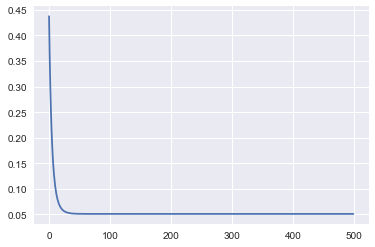

In [257]:
plt.plot( range(iter_num), all_costs )

### Estimate the paramters using sklearn

In [258]:
from sklearn.linear_model import LinearRegression

In [259]:
lreg = LinearRegression()
lmodel = lreg.fit( X.reshape(len(Y), 3), Y.reshape(len(Y), 1) )

In [260]:
lmodel.intercept_

array([  2.66268857e-16])

In [261]:
lmodel.coef_

array([[ 0.75306591,  0.53648155, -0.00433069]])

In [262]:
0.7530/85.85

0.008771112405358184

### Ordinary Least Square - Closed Form Solution

In [263]:
from numpy.linalg import inv

In [264]:
np.matmul( np.matmul( inv( np.matmul( X.T, X ) ), X.T ), Y)

array([ 0.75306591,  0.53648155, -0.00433069])

In [265]:
(5.21*0.75306591)/85.85

0.04570149552824695

In [266]:
(5.21*0.53)/14.84

0.18607142857142858

In [267]:
(5.21*.004)/21.77

0.0009572806614607258